In [5]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
import plotly.express as px
from sklearn.datasets import load_diabetes

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [6]:
# from kneed import KneeLocator

In [7]:
diabetes = load_diabetes()
df_scaler = diabetes['data']

In [8]:
pca = PCA(n_components=2)

principal_comp = pca.fit_transform(df_scaler)

principal_df = pd.DataFrame(data = principal_comp, columns = ['PC1', 'PC2'])
principal_df

,PC1,PC2
0,0.027930,-0.092601
1,-0.134687,0.065263
2,0.012944,-0.077764
3,0.002344,0.018183
4,-0.035979,0.038621
...,...,...
437,0.058958,-0.049276
438,0.060157,0.036212
439,-0.009761,-0.057339
440,0.032957,0.009995


In [9]:
SSE = []
K = range(2,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principal_df)
    SSE.append(kmeanModel.inertia_)

# Kmeans
## where K = 3

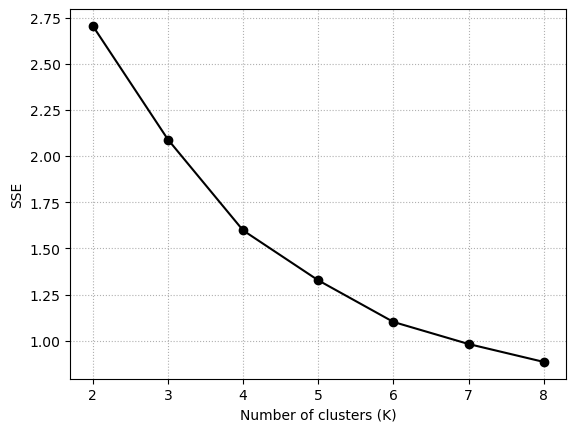

In [15]:
plt.figure()
plt.plot(K, SSE, 'ko-')
plt.grid(linestyle="dotted")
plt.ylabel("SSE")
plt.xlabel('Number of clusters (K)')
plt.show()

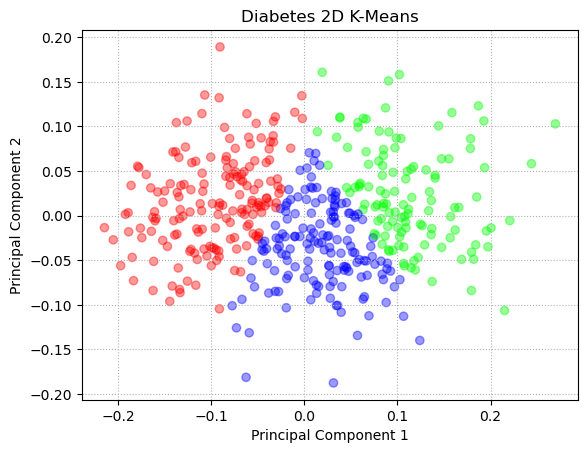

In [16]:
kmeans = KMeans(n_clusters=3).fit(principal_df)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=kmeans.labels_, cmap=plt.cm.brg, alpha=0.4)
plt.title("Diabetes 2D K-Means")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(linestyle="dotted")
plt.show()

Silhouette Score: 0.3256


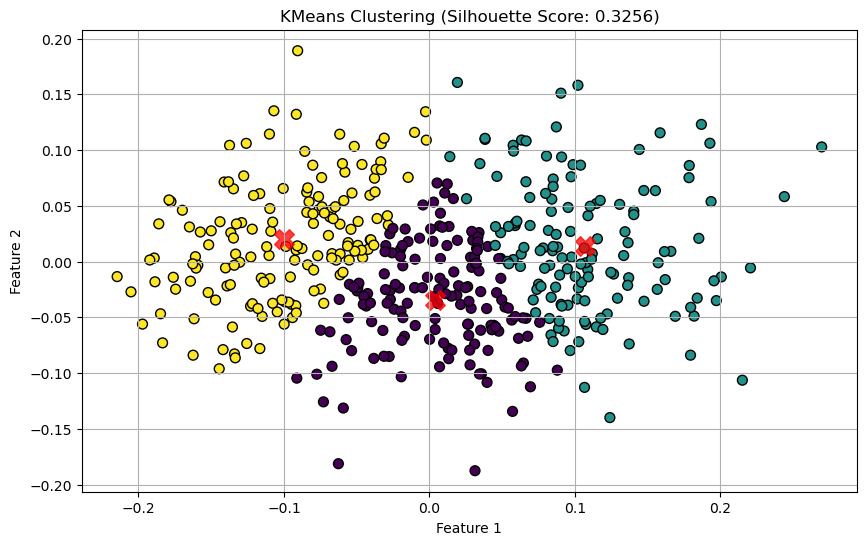

In [17]:
from sklearn.metrics import silhouette_score

principal_comp = pca.fit_transform(df_scaler)
kmeans = KMeans(n_clusters=3).fit(principal_df)

n_clusters = 3  # You can change this to try different numbers of clusters


# Step 4: Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 5: Calculate the Silhouette Score
silhouette_avg = silhouette_score(principal_comp, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Step 6: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(principal_comp[:, 0], principal_comp[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'KMeans Clustering (Silhouette Score: {silhouette_avg:.4f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()


# DBSCAN 

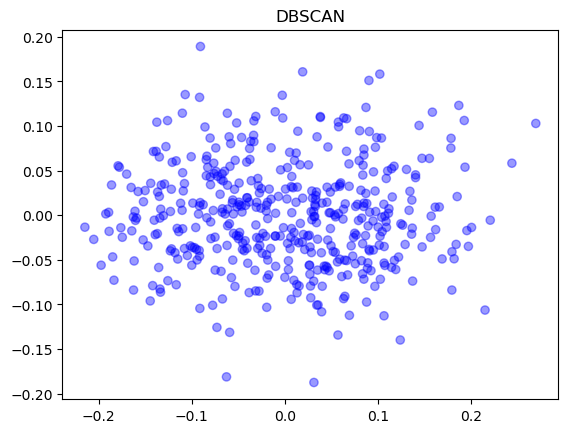

In [52]:
dbscan = DBSCAN(eps=0.4, min_samples=20).fit(principal_df)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=dbscan.labels_, cmap=plt.cm.brg, alpha=0.4)
plt.title("DBSCAN")
plt.show()

Silhouette Score: Not applicable (single cluster or all points are noise)


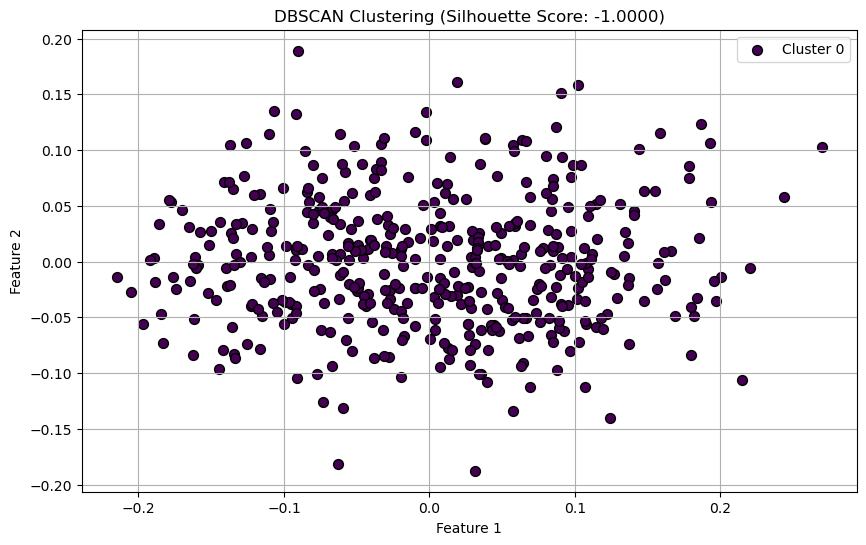

In [54]:
principal_comp = pca.fit_transform(df_scaler)


dbscan = DBSCAN(eps=0.7, min_samples=3)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(principal_comp)

# Step 4: Calculate the Silhouette Score (only for clusters, not noise)
if len(set(labels)) > 1 and len(set(labels)) < len(X):
    silhouette_avg = silhouette_score(principal_comp, labels)
    print(f'Silhouette Score: {silhouette_avg:.4f}')
else:
    silhouette_avg = -1  # Silhouette score is not defined if there's only one cluster or all points are noise
    print('Silhouette Score: Not applicable (single cluster or all points are noise)')

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise points
        col = 'k'  # Black color for noise
    class_member_mask = (labels == k)
    
    plt.scatter(principal_comp[class_member_mask, 0], principal_comp[class_member_mask, 1], 
                c=col, edgecolor='k', s=50, label=f'Cluster {k}')

plt.title(f'DBSCAN Clustering (Silhouette Score: {silhouette_avg:.4f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


# AgglomerativeClustering

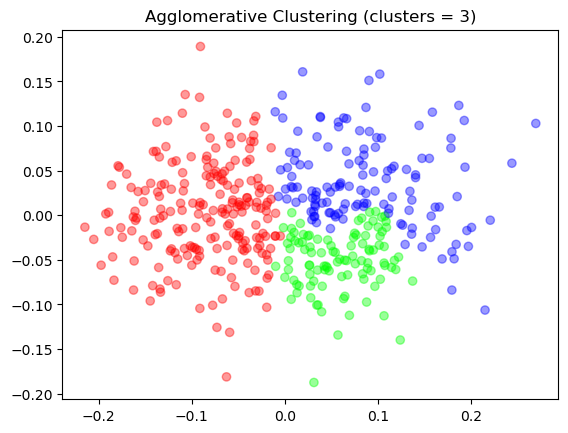

In [12]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=3).fit(principal_df)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=agglomerative_clustering.labels_, cmap=plt.cm.brg, alpha=0.4)
plt.title("Agglomerative Clustering (clusters = 3)")
plt.show()

Silhouette Score: 0.2990


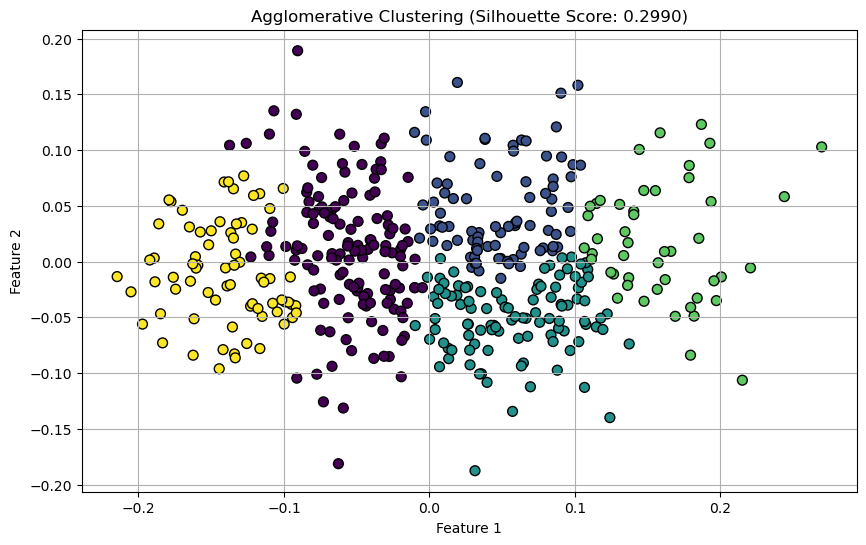

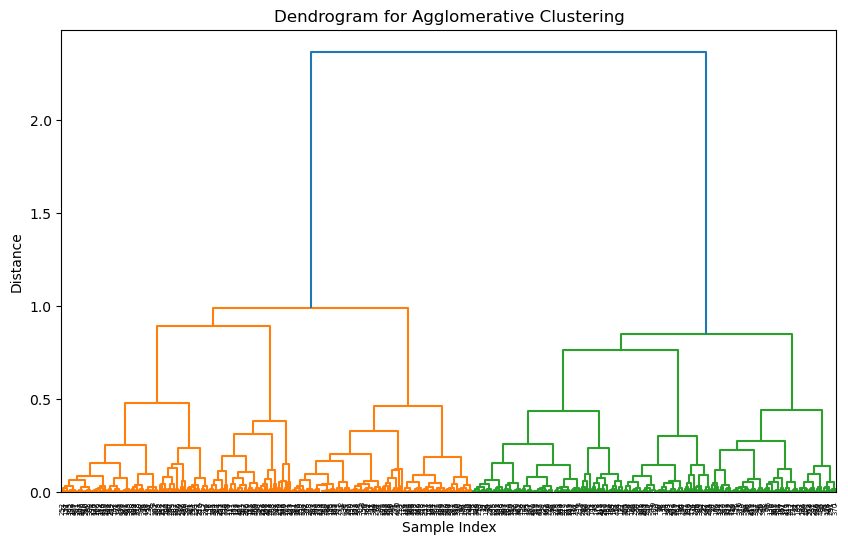

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


principal_comp = pca.fit_transform(df_scaler)

# Step 3: Apply Agglomerative Clustering
n_clusters = 5  # Specify the desired number of clusters
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg_clust.fit_predict(principal_comp)

# Step 4: Calculate the Silhouette Score
silhouette_avg = silhouette_score(principal_comp, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(principal_comp[:, 0], principal_comp[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'Agglomerative Clustering (Silhouette Score: {silhouette_avg:.4f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

# Step 6: Plot Dendrogram
plt.figure(figsize=(10, 6))
linked = linkage(principal_comp, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
